# Métodos de Filtrado

## Correlación (Numérica)

In [8]:
# Cargar nuestros datos
import pandas as pd
import numpy as np

#leer los datos de iris
data = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Ver el tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Valores únicos de los datos
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
#Valores estadísticos básicos
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#División del conjunto de datos
X = data.drop('species',axis=1) # Matriz de características de entrada X "Variables independientes"
y = data['species'] # Matriz de salida y "Variable dependiente"

#Vamos a ver la correlación numérica
print("Correlación entre variables independientes")
X.corr()

Correlación entre variables independientes


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


¿Qué características quitarían?


In [11]:
# Codificación de la variable dependiente

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['y_codif'] = encoder.fit_transform(data['species'])
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,y_codif
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [12]:
y = data['y_codif']
mat_corr = X.apply(lambda x: x.corr(y))
mat_corr

sepal_length    0.782561
sepal_width    -0.419446
petal_length    0.949043
petal_width     0.956464
dtype: float64

In [ ]:
abs_corr = abs(mat_corr)>0.6
abs_corr

sepal_length     True
sepal_width     False
petal_length     True
petal_width      True
dtype: bool

¿Qué características son las más influyentes?
petal_width, petal_length, sepal_length


## Chi Cuadrado (Categóricas)
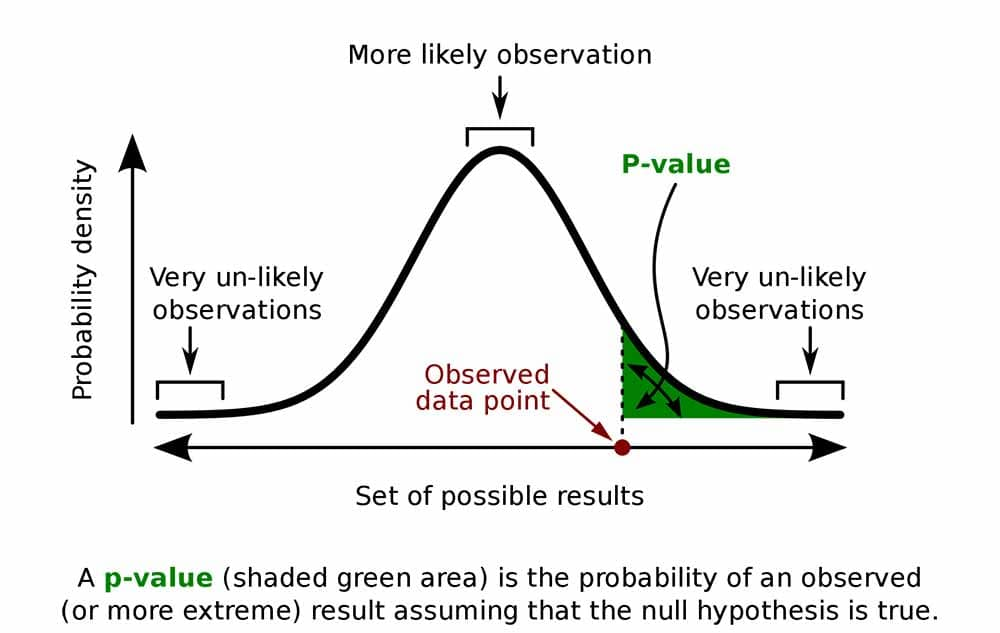

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data.info()
#Preprocesar datos faltantes, nulos, etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
#Variable 'sex'
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [6]:
#Variable 'class'
data['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [10]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [14]:
#Seleccionamos variables categóricas
var_categoricas = data[['sex', 'class','who', 'embark_town']] #Matriz X de entrada
y = data['survived'] #Vector y de salida

In [15]:
from sklearn.preprocessing import LabelEncoder

#Vamos a convertir nuestras variables categóricas a valores numéricos para calcular chi2
var_cat_coded = var_categoricas.apply(LabelEncoder().fit_transform)

In [21]:
from sklearn.feature_selection import chi2, SelectKBest

prueba_chi2 = SelectKBest(score_func=chi2, k='all')
k_best_features = prueba_chi2.fit_transform(var_cat_coded, y)

#Ver que características son las mejores
features = var_categoricas.columns[prueba_chi2.get_support()]
print(f'Características seleccionadas: {features.to_list()}')

Características seleccionadas: ['sex', 'class', 'who', 'embark_town']


In [23]:
#Valores de mi prueba Chi2
chi2_valores = prueba_chi2.scores_
p_valores = prueba_chi2.pvalues_

caract_seleccionadas = pd.DataFrame({'features': var_categoricas.columns, 'p_valor': p_valores, 'Chi2':chi2_valores})
caract_seleccionadas

,features,p_valor,Chi2
0,sex,6.077838e-22,92.702447
1,class,1.581715e-13,54.465866
2,who,1.535897e-07,27.543638
3,embark_town,1.787913e-03,9.755456


p_valor>=0.05
La relación de las variables puede ser debido al azar
p_valor<0.05 
La relación de las variables es poco probable que se deba al azar

## Casos mixtos (Numéricas + Categóricas)

In [24]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Método 1: Por tipo de variable

Método 2: Transformar todas las categóricas a numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

le = LabelEncoder()
data2 = data.copy()

data2['sex_coded'] = le.fit_transform(data2['sex'])
data2['embarked_coded'] = le.fit_transform(data2['embarked'])
data2['class_coded'] = le.fit_transform(data2['class'])
data2['who_coded'] = le.fit_transform(data2['who'])

data2.drop(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis=1, inplace=True)
data2.head()

,survived,pclass,age,sibsp,parch,fare,sex_coded,embarked_coded,class_coded,who_coded
0,0,3,22.0,1,0,7.2500,1,2,2,1
1,1,1,38.0,1,0,71.2833,0,0,0,2
2,1,3,26.0,0,0,7.9250,0,2,2,2
3,1,1,35.0,1,0,53.1000,0,2,0,2
4,0,3,35.0,0,0,8.0500,1,2,2,1


In [28]:
mat_corr = data2.corr()
mat_corr

,survived,pclass,age,sibsp,parch,fare,sex_coded,embarked_coded,class_coded,who_coded
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,-0.163517,-0.338481,0.325753
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.157112,1.000000,-0.196793
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,-0.025252,-0.369226,0.378685
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,0.066654,0.083081,-0.136003
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,0.038322,0.018443,-0.055682
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,-0.221226,-0.549500,0.146290
sex_coded,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,0.104057,0.131900,-0.639773
embarked_coded,-0.163517,0.157112,-0.025252,0.066654,0.038322,-0.221226,0.104057,1.000000,0.157112,-0.060177
class_coded,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,0.157112,1.000000,-0.196793
who_coded,0.325753,-0.196793,0.378685,-0.136003,-0.055682,0.146290,-0.639773,-0.060177,-0.196793,1.000000


Método 3: Información Mutua (Recomendable)
Método 4: ANOVA